## Test


Replacing insidePt with another interface2D object

In [1]:
#use this block to point to a local version of UWsubduction
import sys

sys.path.append('../../../UWsubduction/')

In [2]:
import numpy as np
import underworld as uw
from underworld import function as fn
import glucifer
import operator
import UWsubduction as usub

In [3]:
minX = -1.0
maxX = 1.0
resX = 48
resY = 48
elementType="Q1/dQ0"

mesh = uw.mesh.FeMesh_Cartesian( elementType = (elementType), 
                                 elementRes  = ( resX, resY), 
                                 minCoord    = ( minX, -1.), 
                                 maxCoord    = ( maxX, 1.),
                                 periodic    = [False, False]  ) 


velocityField    = uw.mesh.MeshVariable( mesh=mesh,         nodeDofCount=mesh.dim )

velocityField.data[:] = [0.,0.]


In [4]:
#spiral points

def polar_to_cartesian(r, theta):
    return r*np.cos(theta), r*np.sin(theta)


def spiral(N, thetastart, dtheta, rstart, rend):
    points = []
    rs = np.linspace(rstart, rend, N)
    rnorm = rs.mean()
    theta= thetastart
    sp = polar_to_cartesian(rstart, theta)
    points.append(sp)
    for i in range(1, N):
        sp = polar_to_cartesian(rs[i], theta)
        points.append(sp)
        theta += dtheta/(rs[i]/rnorm)
        
    return np.array(points)
        
     

In [5]:
coordinate = fn.input()
yFn = coordinate[1]

In [6]:
velocityField.data[:,0] = 2.*yFn.evaluate(mesh)[:,0] #dVx/dy = 1
velocityField.data[:,1] = 0.

In [7]:
swarm = uw.swarm.Swarm( mesh=mesh, particleEscape=False)
proximityVariable = swarm.add_variable( dataType="int", count=1 )
directorVariable   = swarm.add_variable( dataType="double", count=2)

swarmLayout = uw.swarm.layouts.GlobalSpaceFillerLayout( swarm=swarm, particlesPerCell=20 )
swarm.populate_using_layout( layout=swarmLayout )

proximityVariable.data[:] = 0
directorVariable .data[:] = (0.0, 0.0)

In [8]:
line = usub.interface2D(mesh, velocityField, [], [],
                        0.1, 1, insidePt=(0., -10.))
                        
refline = usub.interface2D(mesh, velocityField, [], [],
                        0.1, 2, insidePt=(0.,-10.))




In [9]:
print('got to adding points')

got to adding points


In [10]:
testPs = spiral(50, 0, np.deg2rad(5.5), 0.05, 0.8)

refline.add_points(1.05*testPs[:,0], 1.05*testPs[:,1])
line.add_points(testPs[:,0], testPs[:,1])


#now assign the refline as the insidePt for the line
line.insidePt = refline

uw.mpi.barrier()

print(isinstance(line.insidePt, usub.interface2D))

#line.rebuild()

line._update_surface_normals()

True


In [11]:
#line.kdtree.query((0.,0.), k = 3)

In [13]:
isinstance((1,2), tuple), True is False

hasattr(line, 'len')


False

In [14]:
print('finished adding points')

finished adding points


In [15]:
#%pylab inline
#plt.scatter(testPs[:,0], testPs[:,1])
#plt.scatter(testPs[:,0]*1.1, testPs[:,1]*1.1)

In [16]:
print(line.director.data[:,0])

[ 0.99999851  0.95064941  0.96252621  0.70881912  0.35401959 -0.00488198
 -0.3211751  -0.57626186 -0.76643466 -0.89541173 -0.97022828 -0.99902511
 -0.98989924 -0.95034439 -0.88701593 -0.80567047 -0.71119569 -0.60768316
 -0.49851804 -0.38647128 -0.27378729 -0.16226366 -0.05332164  0.05193253
  0.15265494  0.2482191   0.33817792  0.4222316   0.50020069  0.5720035
  0.6376372   0.69716201  0.75068815  0.79836482  0.84037125  0.87690911
  0.90819638  0.93446224  0.95594291  0.97287823  0.98550892  0.99407433
  0.99881067  0.99994962  0.99771722  0.99233304  0.98400954  0.97295166
  0.95935649  0.96642487]



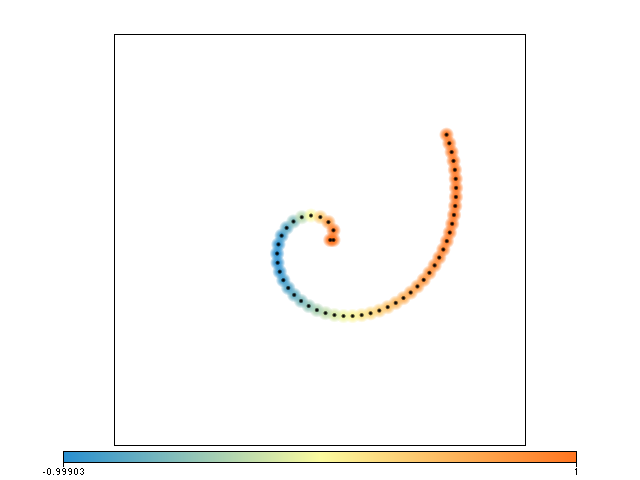

'test.gldb'

In [19]:
fig2 = glucifer.Figure()
#fig1.append( glucifer.objects.VectorArrows(mesh, velocityField, scaling=.1) )
fig2.append( glucifer.objects.Surface(mesh, 0., colours = 'red white yellow', colourBar=False)) 
fig2.append( glucifer.objects.Points(line.swarm, pointsize = 5))
#fig1.append( glucifer.objects.Points(refline.swarm, pointsize = 5))
#fig2.append( glucifer.objects.Points(line.swarm, line.director[0], pointsize = 15))

#fig2.show()
fig2.save_database('test.gldb')

Populating the interactive namespace from numpy and matplotlib


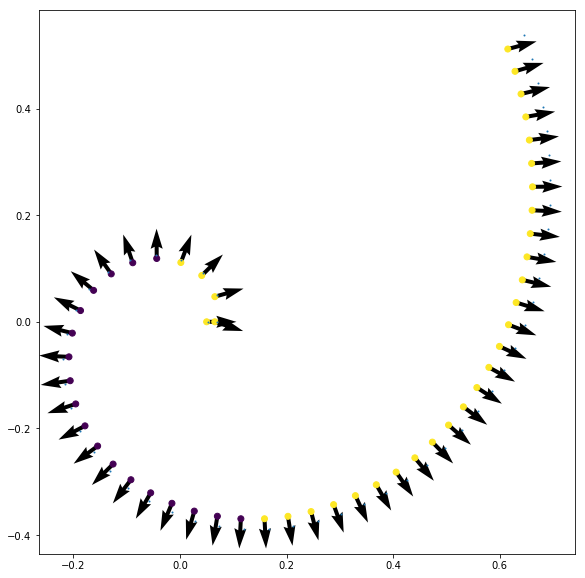

In [20]:
#%pylab inline

#checkData =line.director.data[:,0] > 0.

#fig, ax = plt.subplots(figsize=(10.,10))

#Q = ax.quiver(testPs[:,0], testPs[:,1], 
#               line.director.data[:,0], line.director.data[:,1], units='width')

#ax.scatter(testPs[:,0], testPs[:,1], c=checkData)
#ax.scatter(1.05*testPs[:,0], 1.05*testPs[:,1],  s = 1)

#ax.set_aspect('equal')

In [59]:
#i = 10
#particle_coords = line.swarm.particleCoordinates.data
#r, nindex = line.insidePt.kdtree.query(particle_coords, k=1)

In [19]:
#nindex